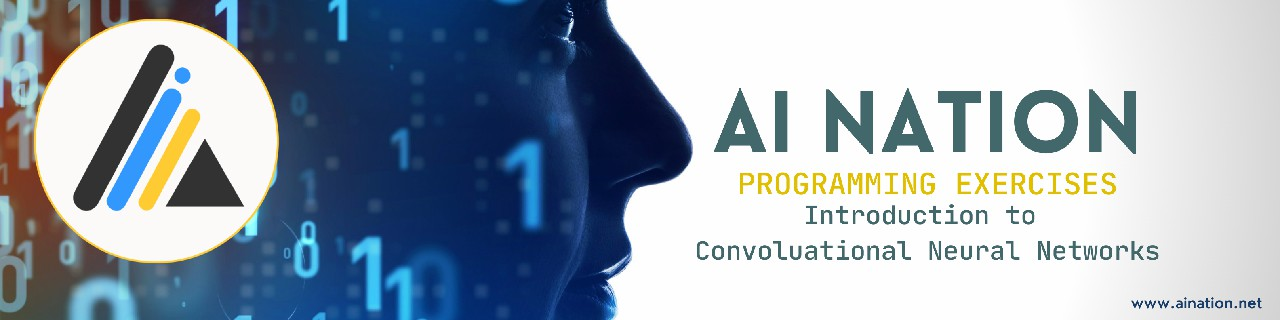

In [3]:
import cv2
import os

In [4]:
root_path = os.getcwd()+"\\cats_and_dogs_filtered"
train_path = root_path+"\\train"
validation_path=  root_path+"\\validation"


train_cats_dir = train_path+"\\cats"
train_dogs_dir  = train_path+"\\dogs"
validation_cats_dir =   validation_path+"\\cats"
validation_dogs_dir =    validation_path+"\\dogs"

In [5]:
train_cats_dir

'D:\\AI-Nation_Courses\\Data_Science_Foundation\\DL\\cat_and_dog\\cats_and_dogs_filtered\\train\\cats'

In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir )))
print('total training dog images :', len(os.listdir(train_dogs_dir )))

print('total validation cat images :', len(os.listdir( validation_cats_dir )))
print('total validation dog images :', len(os.listdir( validation_dogs_dir )))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(200, 200))     

validation_generator =  test_datagen.flow_from_directory(validation_path,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (200, 200))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Test  Generators

In [8]:
for temp   in train_generator:
    print(temp[0].shape)
    print(len(temp))

(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2


(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2
(20, 200, 200, 3)
2


KeyboardInterrupt: 

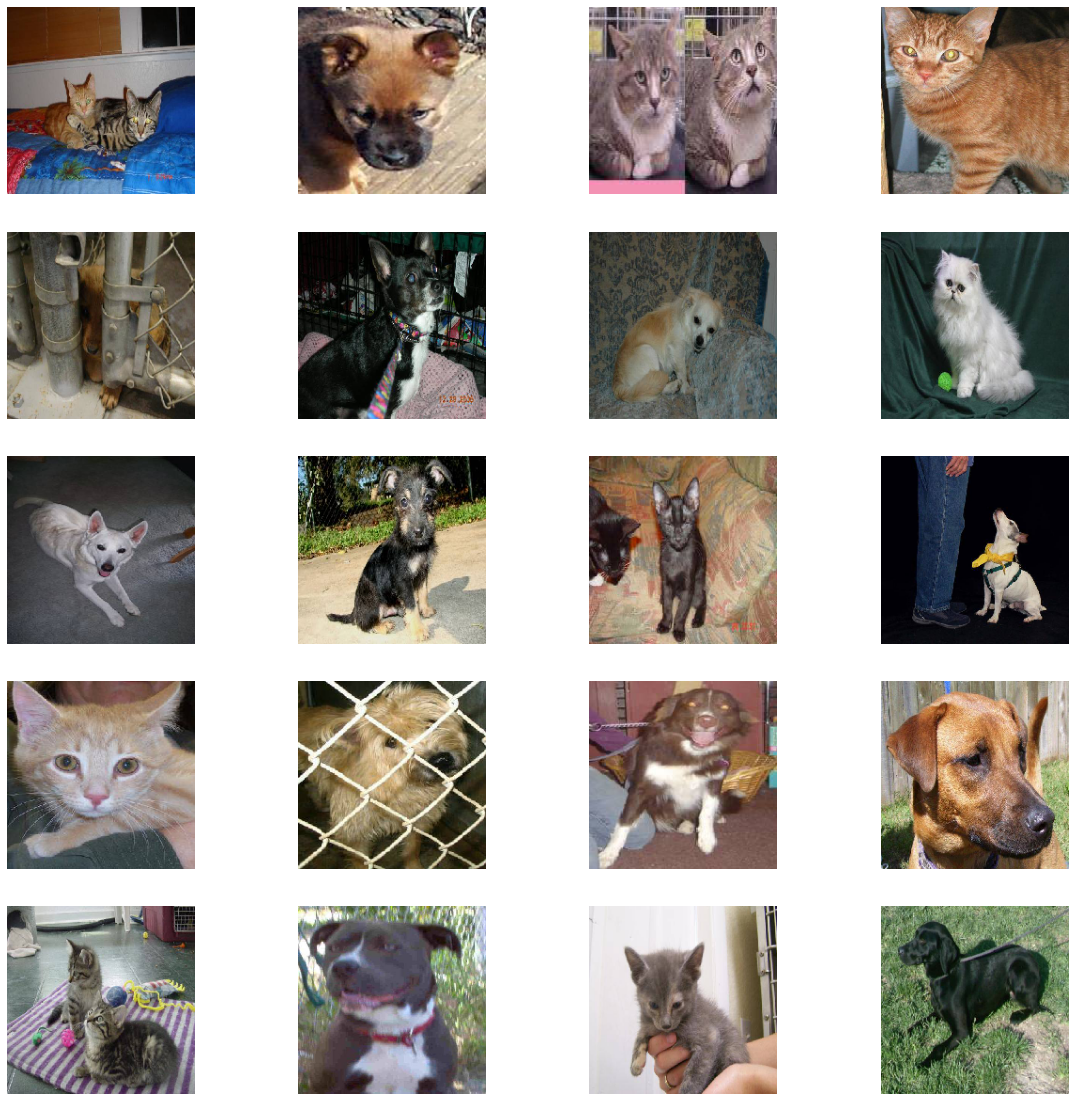

In [13]:
import  matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize =  (20,20))
for temp   in (validation_generator):
    for  i,cur_img in enumerate(temp[0]):
        sp = plt.subplot(5,4, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)
        img = cur_img
        plt.imshow(img)
    break

plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [31]:
model= Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2), 
    Conv2D(64, (3,3), activation='relu'), 
    MaxPooling2D(2,2),

    Flatten(), 
    Dense(512, activation='relu'), 
    Dense(1, activation='sigmoid')  
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 33856)            

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [22]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=1)

Epoch 1/15
100/100 [==============================] - 6s 59ms/step - loss: 1.0908 - accuracy: 0.5415 - val_loss: 0.6593 - val_accuracy: 0.5930
Epoch 2/15
100/100 [==============================] - 6s 58ms/step - loss: 0.6865 - accuracy: 0.6420 - val_loss: 0.6370 - val_accuracy: 0.6340
Epoch 3/15
100/100 [==============================] - 6s 58ms/step - loss: 0.5677 - accuracy: 0.7110 - val_loss: 0.6027 - val_accuracy: 0.6900
Epoch 4/15
100/100 [==============================] - 6s 57ms/step - loss: 0.4770 - accuracy: 0.7780 - val_loss: 0.5938 - val_accuracy: 0.7190
Epoch 5/15
100/100 [==============================] - 6s 57ms/step - loss: 0.3746 - accuracy: 0.8285 - val_loss: 0.6818 - val_accuracy: 0.7200
Epoch 6/15
100/100 [==============================] - 6s 58ms/step - loss: 0.2807 - accuracy: 0.8845 - val_loss: 0.6596 - val_accuracy: 0.6890
Epoch 7/15
100/100 [==============================] - 6s 58ms/step - loss: 0.1944 - accuracy: 0.9335 - val_loss: 0.8897 - val_accuracy: 0.7080

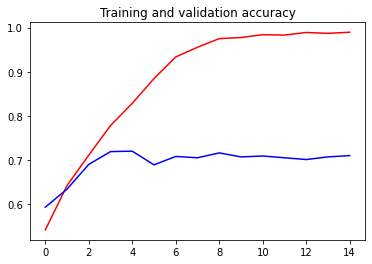

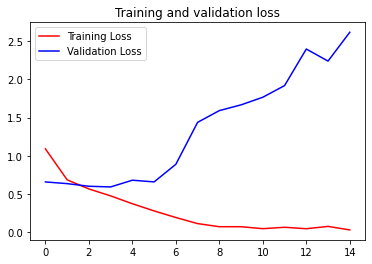

In [23]:
import  matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

(1, 200, 200, 3)


C:\Users\LINK\anaconda3\envs\tharhtet\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


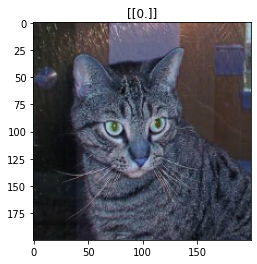

In [25]:
import  numpy as  np
image_path =  r"D:\AI-Nation_Courses\Data_Science_Foundation\DL\cat_and_dog\cats_and_dogs_filtered\train\cats\cat.1.jpg"

img =  cv2.imread(image_path)
img = cv2.resize(img,(200,200))
input_img = np.expand_dims(img,0)
print(input_img.shape)
plt.title(model.predict(input_img))
plt.imshow(img)
plt.show()

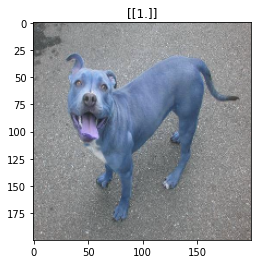

In [26]:
image_path =  r"D:\AI-Nation_Courses\Data_Science_Foundation\DL\cat_and_dog\cats_and_dogs_filtered\train\dogs\dog.14.jpg"

img =  cv2.imread(image_path)
img = cv2.resize(img,(200,200))
input_img = np.expand_dims(img,0)
plt.title(model.predict(input_img))
plt.imshow(img)
plt.show()